In [131]:
import numpy as np
from scipy.fftpack import dct
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from skimage import exposure
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, balanced_accuracy_score
from skimage.transform import resize
import math

In [132]:
# Extract data
X = np.load('Xtrain_Classification_Part1.npy')
y = np.load('Ytrain_Classification_Part1.npy')

X_train, X_validate, y_train, y_validate = train_test_split(X, y)

X_train = X_train/255.0
X_validate = X_validate/255.0

In [133]:
#Histogram equalization

images_train = []

for image in X_train:
    img = exposure.equalize_hist(image)
    img = resize(img, (32,32))
    images_train.append(img)

images_validate = []

for image in X_validate:
    img = exposure.equalize_hist(image)
    img = resize(img, (32,32))
    images_validate.append(img)

In [134]:
#Extract features from each image

features_train = []

for image in images_train:
    dct_coefficients = []

    tiles = [image[x:x+8,y:y+8] for x in range(0,image.shape[0],8) for y in range(0,image.shape[1],8)]

    for tile in tiles:
        dct_pixels = dct(tile)

        max = -math.inf
        x = 0
        y = 0

        for i in len(dct_pixels):
            for j in len(dct_pixels[0]):
                if dct_pixels[i][j] > max:
                    x = i
                    y = j

        dct_coefficients.append((x,y))
        
    features_train.append(np.asarray(dct_coefficients))

features_validate = []

for image in images_validate:
    dct_coefficients = []

    tiles = [image[x:x+8,y:y+8] for x in range(0,image.shape[0],8) for y in range(0,image.shape[1],8)]

    for tile in tiles:
        """
        dct_pixels = dct(tile)
        dct_coefficients.append(dct_pixels[0][0])
        """
        dct_pixels = dct(tile)

        max = -math.inf
        x = 0
        y = 0

        for i in len(dct_pixels):
            for j in len(dct_pixels[0]):
                if dct_pixels[i][j] > max:
                    x = i
                    y = j

        dct_coefficients.append((x,y))

    features_validate.append(np.asarray(dct_coefficients))



TypeError: 'int' object is not iterable

In [ ]:
model = KNeighborsClassifier(n_neighbors=59)
model.fit(features_train, y_train)

KNeighborsClassifier(n_neighbors=59)

BACC = 63.00098928900575


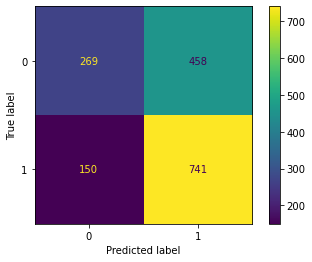

In [ ]:
y_pred = model.predict(features_validate)
bacc = balanced_accuracy_score(y_pred, y_validate)

cm = confusion_matrix(y_validate, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
print(f"BACC = {bacc * 100}")